<a href="https://colab.research.google.com/github/ManukyanErik/Kaggle/blob/main/Neural%20Network/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [33]:
TEST  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2.Projects/Digit Recognizer/test.csv')
TRAIN = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2.Projects/Digit Recognizer/train.csv')

In [34]:
train_Y = TRAIN.iloc[:, :1]
train_X = TRAIN.iloc[:, 1:]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2)

In [36]:
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# Dense Neural Network

In [37]:
x_train.shape

(33600, 784)

In [38]:
model_dnn = keras.Sequential([
    Flatten(input_shape=(784, 1)),
    Dense(1568, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax', )
])

print(model_dnn.summary())      

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 1568)              1230880   
                                                                 
 dense_8 (Dense)             (None, 128)               200832    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,433,002
Trainable params: 1,433,002
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
myAdam = keras.optimizers.Adam()
myOpt  = keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=True)

In [40]:
model_dnn.compile(optimizer=myAdam,
                  loss=keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

In [41]:
DNN = model_dnn.fit(x_train, y_train_cat, epochs=6, validation_split=0.2)

Epoch 1/6
840/840 [==============================] - 4s 4ms/step - loss: 0.2409 - accuracy: 0.9254 - val_loss: 0.1417 - val_accuracy: 0.9582
Epoch 2/6
840/840 [==============================] - 3s 3ms/step - loss: 0.1012 - accuracy: 0.9679 - val_loss: 0.1319 - val_accuracy: 0.9610
Epoch 3/6
840/840 [==============================] - 4s 5ms/step - loss: 0.0638 - accuracy: 0.9795 - val_loss: 0.1062 - val_accuracy: 0.9707
Epoch 4/6
840/840 [==============================] - 3s 3ms/step - loss: 0.0457 - accuracy: 0.9847 - val_loss: 0.1188 - val_accuracy: 0.9676
Epoch 5/6
840/840 [==============================] - 3s 3ms/step - loss: 0.0361 - accuracy: 0.9881 - val_loss: 0.1349 - val_accuracy: 0.9683
Epoch 6/6
840/840 [==============================] - 3s 3ms/step - loss: 0.0265 - accuracy: 0.9909 - val_loss: 0.1257 - val_accuracy: 0.9693


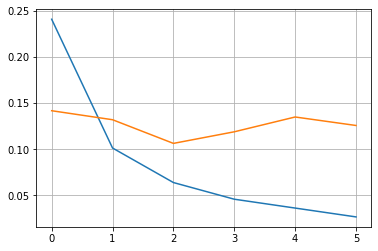

In [42]:
plt.plot(DNN.history['loss'])
plt.plot(DNN.history['val_loss'])
plt.grid(True)
plt.show()

In [43]:
model_dnn.evaluate(x_test, y_test_cat)

263/263 [==============================] - 1s 3ms/step - loss: 0.1222 - accuracy: 0.9705


[0.12224381417036057, 0.9704762101173401]

In [44]:
pred = model_dnn.predict(TEST)
pred = np.argmax(pred, axis=1)

pred[:20]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0])

# Convolutional Neural Network

In [45]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [46]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

In [47]:
model_cnn = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

print(model_cnn.summary())      

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [48]:
model_cnn.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [49]:
CNN = model_cnn.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
840/840 [==============================] - 4s 4ms/step - loss: 0.1891 - accuracy: 0.9437 - val_loss: 0.0966 - val_accuracy: 0.9708
Epoch 2/5
840/840 [==============================] - 4s 4ms/step - loss: 0.0556 - accuracy: 0.9822 - val_loss: 0.0845 - val_accuracy: 0.9772
Epoch 3/5
840/840 [==============================] - 4s 5ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0612 - val_accuracy: 0.9814
Epoch 4/5
840/840 [==============================] - 3s 4ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0693 - val_accuracy: 0.9811
Epoch 5/5
840/840 [==============================] - 4s 4ms/step - loss: 0.0181 - accuracy: 0.9948 - val_loss: 0.0583 - val_accuracy: 0.9838


In [50]:
model_cnn.evaluate(x_test, y_test_cat)

263/263 [==============================] - 1s 3ms/step - loss: 0.0447 - accuracy: 0.9883


[0.04469427093863487, 0.9883333444595337]

In [51]:
pred = model_dnn.predict(TEST)
pred = np.argmax(pred, axis=1)
pred[:20]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0])

In [52]:
ids = list(range(1, len(pred)+1))
df = pd.DataFrame({"ImageId":ids,'Label': pred})

# import the modules we'll need
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index = False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


create_download_link(df)